Correlation between groupiness parameter and spectral shape

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import gaussian_kde
import seaborn as sns
import os, sys
import numpy as np
import pandas as pd
from glob import glob
import matplotlib.pyplot as plt
from scipy import interpolate
from datetime import datetime, timedelta
from importlib import reload
import warnings
sys.path.append('/home/hp/git/ocean-wave')
import buoys
import waveproc
# import wavegroup
reload(buoys)
reload(waveproc)
# reload(wavegroup)
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from scipy.signal import morlet
from matplotlib.ticker import FormatStrFormatter


In [17]:
# leitura dos parametros calculados da waverider

pth = '../data/proc/'

boia = pd.read_csv(pth + 'param_siodoc_16.csv',
                        parse_dates=True, index_col='date')

boia = boia.iloc[:-1, :]

In [18]:
# largura de banda calculado igual do artigo borge 2004

boia['nu1'] = np.sqrt( ( (boia.m2*boia.m0) / (boia.m1**2) ) - 1 )
boia['nu2'] = np.sqrt( ( ( (boia.m2 * boia.m0) - (boia.m1**2) ) / boia.m1**2 ) )
boia['nu3'] = np.sqrt( ( ( (boia.m0 * boia.m4) - (boia.m2**2) ) / boia.m0 * boia.m4 ) )

In [19]:
vv = ['hm0', 'tp', 'tm02',
       'tm', 'e', 'v', 'Qp', 'L0', 'k0', 'BFI', 'm0_hilbert', 'GF_hilbert',
       'hs', 'ts', 'h10', 'hmax', 'tz', 'thmax', 'hmaxhs', 'kurt_n', 'skew_n',
       'kurt_H', 'skew_H', 'kurt_T', 'skew_T', 'corr_H', 'corr_T']

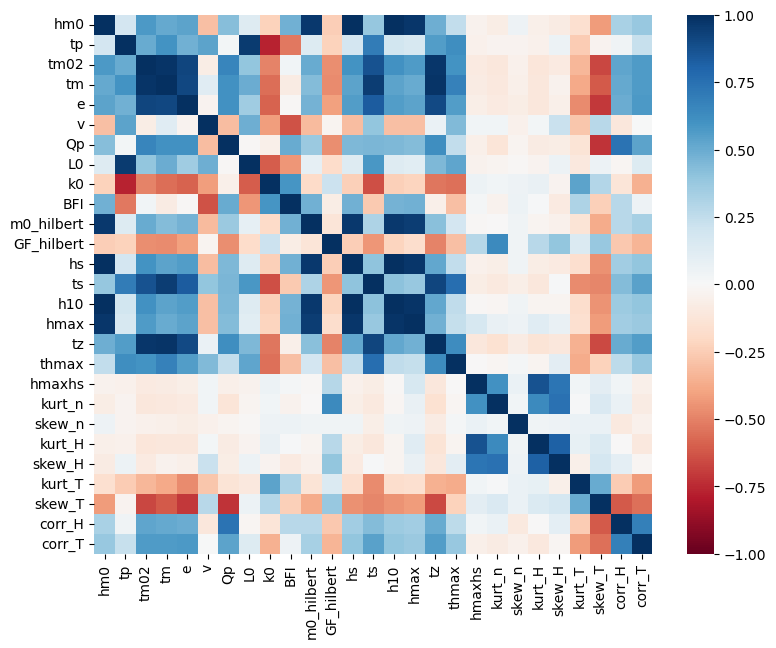

In [20]:
# matriz de correlacao entre parametos

%matplotlib inline

fig, ax = plt.subplots(figsize=(9, 7))
sns.heatmap(boia[vv].corr(), annot=False, vmin=-1, vmax=1, cmap='RdBu', ax=ax);
# fig.savefig('/home/hp/git/latex-phd/figures/matriz_correlacao_parametros.png', bbox_inches='tight')

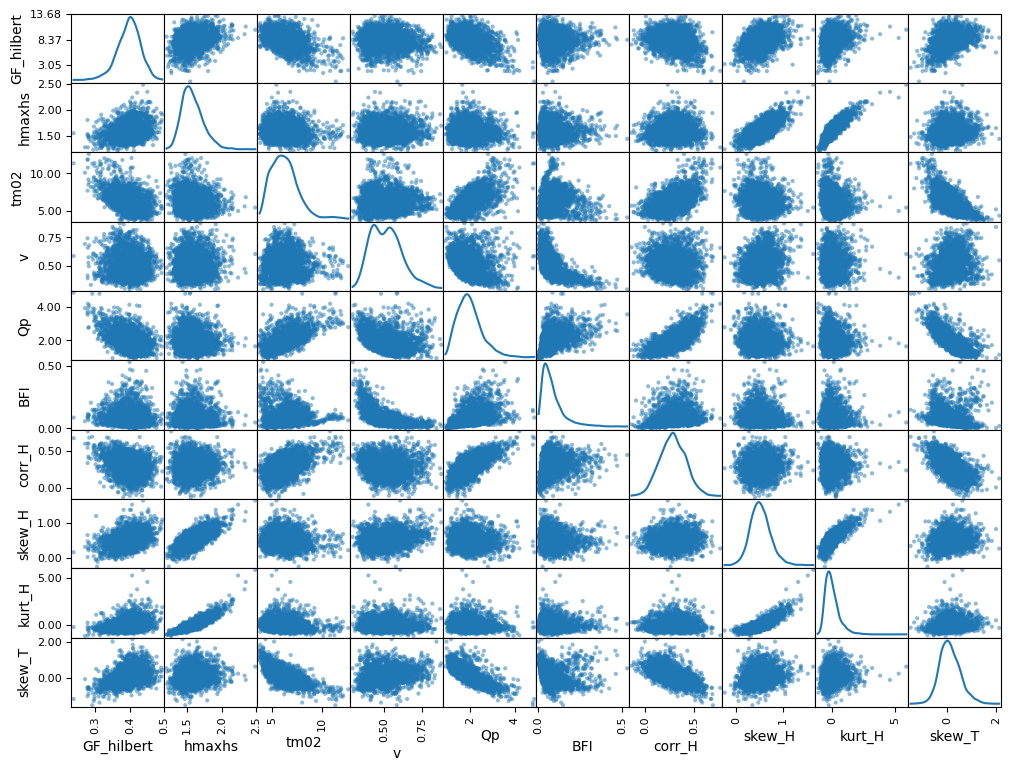

In [21]:
%matplotlib inline


# pd.plotting.scatter_matrix(boia[['e', 'v', 'Qp', 'BFI', 'corr_H', 'GF_hilbert', 'Ss_wafo', 'Ka_wafo', 'hmaxhs']],
pd.plotting.scatter_matrix(boia[['GF_hilbert', 'hmaxhs', 'tm02', 'v', 'Qp', 'BFI', 'corr_H', 'skew_H', 'kurt_H', 'skew_T']],
                           figsize=(12, 9),
                           diagonal='kde');

for ax in plt.gcf().get_axes():
    if hasattr(ax.yaxis, 'set_major_formatter'):
        ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))

# plt.yticks([round(i, 2) for i in plt.yticks()[0]])

# fig.savefig('/home/hp/git/latex-phd/figures/dist_conj_corr_H_corr_T_Qp.png',
#             bbox_inches='tight')

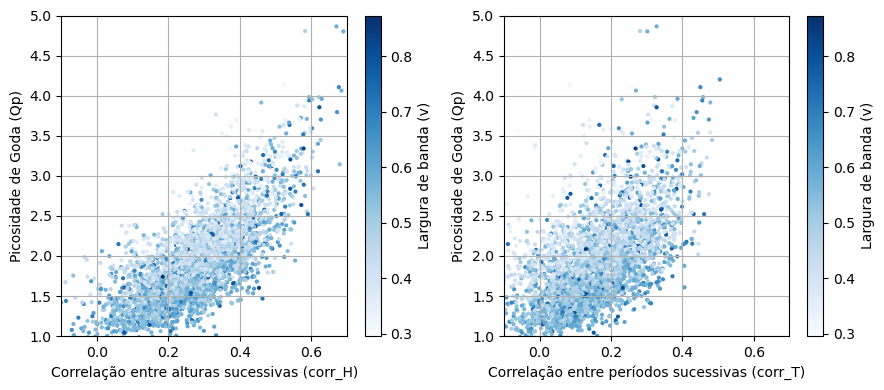

In [22]:

fig = plt.figure(figsize=(9, 4))

ax1 = fig.add_subplot(121)
# density = gaussian_kde(boia.nu1)
# sc = ax1.scatter(boia.corr_H, boia.Qp, c=density(boia.nu1), s=4, cmap='Blues')
sc = ax1.scatter(boia.corr_H, boia.Qp, c=boia.v, s=4, cmap='Blues')#, vmim=0.16, vmax=0.4)
cbar = plt.colorbar(sc, label='Largura de banda (v)')
# ax1.set_yscale("log")
ax1.set_xlabel('Correlação entre alturas sucessivas (corr_H)')
ax1.set_ylabel('Picosidade de Goda (Qp)')
ax1.grid()
# ax1.set_yticks(np.arange(0, 0.6, 0.05))
ax1.set_xlim(left=-0.1, right=0.7)
ax1.set_ylim(bottom=1, top=5.0)

# ax1.plot(x_fit, y_fit, label='Fitted curve')

# ax1.set_title(equation)

ax2 = fig.add_subplot(122)
# density = gaussian_kde(boia.nu1)
# sc = ax1.scatter(boia.corr_H, boia.Qp, c=density(boia.nu1), s=4, cmap='Blues')
sc = ax2.scatter(boia.corr_T, boia.Qp, c=boia.v, s=4, cmap='Blues')#, vmim=0.16, vmax=0.4)
cbar = plt.colorbar(sc, label='Largura de banda (v)')
# ax1.set_yscale("log")
ax2.set_xlabel('Correlação entre períodos sucessivas (corr_T)')
ax2.set_ylabel('Picosidade de Goda (Qp)')
ax2.grid()
ax2.set_xlim(left=-0.1, right=0.7)
ax2.set_ylim(bottom=1, top=5.0)

fig.tight_layout()

# fig.savefig('/home/hp/git/latex-phd/figures/dist_conj_corr_H_corr_T_Qp.png',
            # bbox_inches='tight')

In [25]:
boia.GF_hilbert

date
2014-07-16 16:00:00    0.4057
2014-07-16 17:00:00    0.3809
2014-07-16 18:00:00    0.3187
2014-07-16 19:00:00    0.3840
2014-07-16 20:00:00    0.4577
                        ...  
2014-11-19 06:00:00    0.3612
2014-11-19 07:00:00    0.3804
2014-11-19 08:00:00    0.4286
2014-11-19 09:00:00    0.4031
2014-11-19 10:00:00    0.4132
Name: GF_hilbert, Length: 3019, dtype: float64